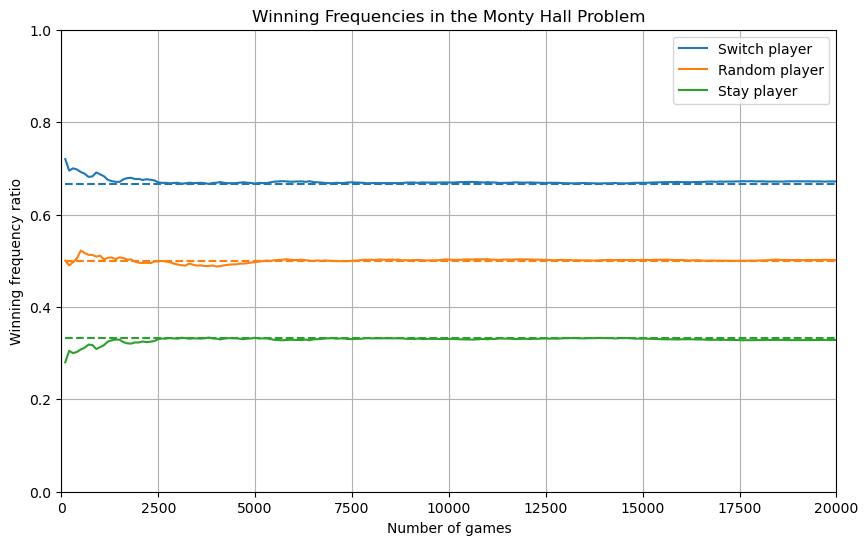

In [10]:
import numpy as np
import random as rd
from matplotlib import pyplot as plt

p1 = np.array((0,0))
p2 = np.array((0,0))
p3 = np.array((0,0))

n_part = 20000
n_door = 3
n_choice = 2
n_goat = n_door - n_choice

data = np.zeros((1,4))

for i in range (1,n_part+1):
    choice = rd.randint(0,n_door-1)
    p1[0] = choice
    p2[0] = choice
    car = rd.randint(0,n_door-1)

    check = 0
    door_op = np.array([])
    while check<n_goat:
        remove = rd.randint(0,n_door-1)
        while remove==choice or remove in door_op or remove==car:
            remove = rd.randint(0,n_door-1)
        door_op = np.append(door_op, remove)
        check +=1
           
    while choice==p1[0] or p1[0] in door_op:
        p1[0] = rd.randint(0,n_door-1)

    p3[0] = rd.randint(0,n_door-1) 
    while p3[0] in door_op:
        p3[0] = rd.randint(0,n_door-1)
        
    if p1[0] == car:
        p1[1] += 1
    if p2[0] == car:
        p2[1] += 1
    if p3[0] == car:
        p3[1] += 1
        
    if i==100:
        data[0,0] = i
        data[0,1] = p1[1]/i
        data[0,2] = p2[1]/i
        data[0,3] = p3[1]/i
        
    if i%100 == 0 and i>100:
        data = np.append(data,[[i, p1[1]/i, p2[1]/i, p3[1]/i]], axis=0)

fig1,ax1 = plt.subplots(figsize= (10,6))
ax1.plot(data[:,0], data[:,1], label="Switch player",  color='tab:blue')
ax1.plot(data[:,0], data[:,3], label="Random player", color='tab:orange')
ax1.plot(data[:,0], data[:,2], label="Stay player", color='tab:green')

ax1.plot(data[:,0], (2/3)*np.ones(len(data[:,0])), linestyle='--', color='tab:blue')
ax1.plot(data[:,0], (1/3)*np.ones(len(data[:,0])), linestyle='--', color='tab:green')
ax1.plot(data[:,0], (1/2)*np.ones(len(data[:,0])), linestyle='--', color='tab:orange')
ax1.set_xlabel("Number of games")
ax1.set_ylabel("Winning frequency ratio")
ax1.set_ylim(0, 1)
ax1.set_xlim(0, n_part)
ax1.legend()
ax1.set_title("Winning Frequencies in the Monty Hall Problem")
ax1.grid()
    
#print("Su ", n_part, " partite \np1 ha vinto:",p1[1], "volte \np2 ha vinto:",p2[1], "volte \np3 ha vinto:",p3[1], "volte")


